In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.io import wavfile
from scipy import signal
import time

# Arbitrary Frequency Response

### reading the data

Text(0.5, 0, 'Frequency ($\\Omega$)')

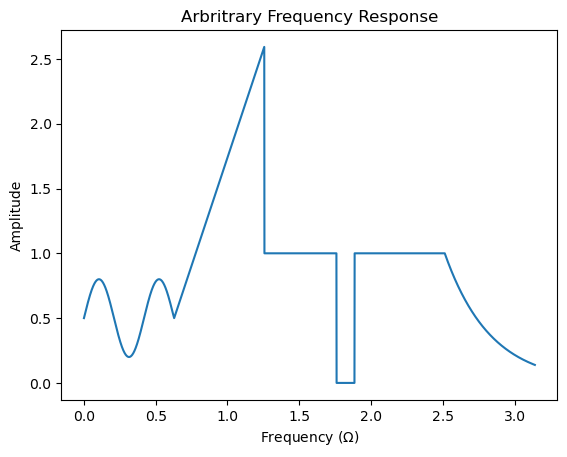

In [2]:
freqresponse = np.loadtxt("Data/arb_freq_resp.csv", delimiter=",")
omega = np.linspace(0,np.pi,len(freqresponse))

plt.plot(omega, freqresponse)
plt.title('Arbritrary Frequency Response')
plt.ylabel('Amplitude')
plt.xlabel('Frequency ($\Omega$)')

## Importing old IDFT function

In [3]:
def IDFT(elements):
    k = len(elements)
    N = k
    signal = [0]*N
    for n in range(N):
        j = 0
        for j in range(k):
            signal[n] += 1/N * elements[j]*cmath.exp(complex(0,2*np.pi*j*n/N))
    return signal

## Applying IDFT to Data

c:\Users\georg\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


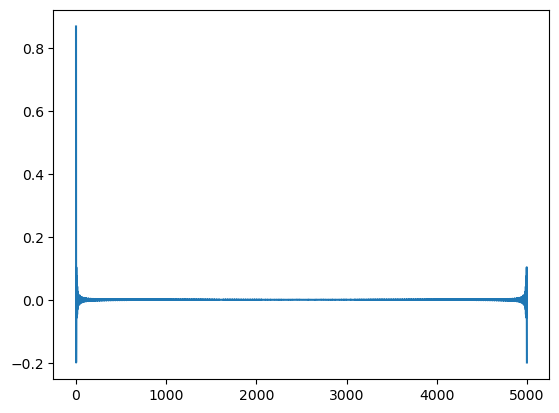

In [4]:
idftdata = np.fft.ifft(np.abs(freqresponse)) # using numpy because its way faster
plt.plot(idftdata)

## Shift and truncate IDFT data

30


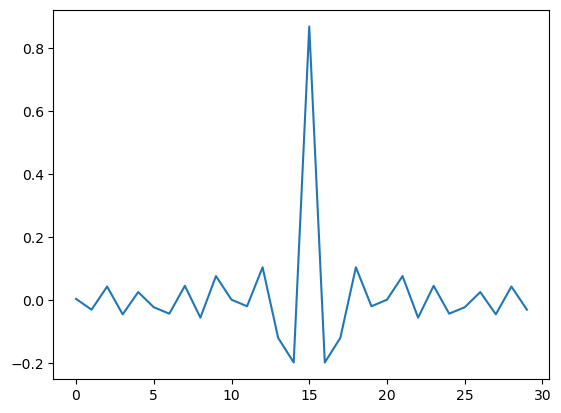

In [5]:
N = int(30/2)

signal = np.concatenate((idftdata[-N:], idftdata[:N]))
print(len(signal))
plt.plot(signal)

## Apply DFT to filter kernel to check it returns the original data

### Importing old DFT function

In [6]:
def DFT(signal):
    N = len(signal) # number of points in the signal
    k = N # a separate counter for the number of frequencies to test
    elements = [0]*k # initialize results signal
    j = 0
    for j in range(k):
        n = 0
        for n in range(N):
            elements[j] += signal[n]*cmath.exp(complex(0,-2*np.pi*j*n/N))
    return elements

Text(0.5, 0, 'Frequency ($\\Omega$)')

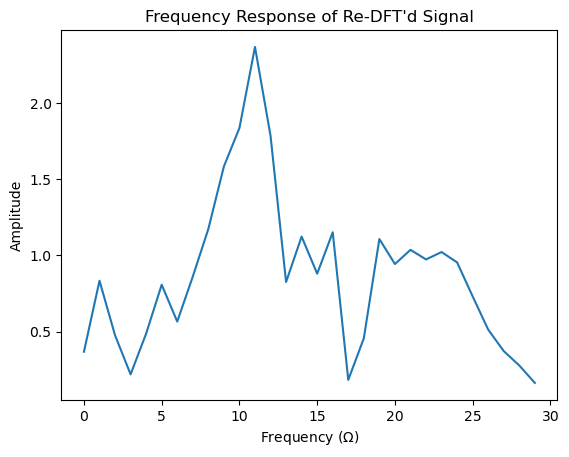

In [7]:
dftsignal = np.abs(DFT(signal))
plt.plot(dftsignal)
plt.title("Frequency Response of Re-DFT'd Signal")
plt.ylabel('Amplitude')
plt.xlabel('Frequency ($\Omega$)')

## Apply Hamming Window and try DFT again

### import old window function

In [8]:
def window(type, N):
    '''type(str): specify the type of window to be generated - Square, Hanning, Hamming, Blackman'''
    '''N(int): specify the width of the window by number of data points'''

    hn = [0]*N

    i = -N//2+1
    ii = 0
    '''The formula used depends on the specified window type, and is then applied across the length of the resulting window'''
    if type == 'Square':
        for ii in range(N):
            hn[ii] = 1
    
    elif type == 'Hanning':
        for ii in range(N):
            i = ii - N//2+1 # a separate counter to shift the window function for correct indexing
            hn[ii] = 0.5 + 0.5*np.cos(2*np.pi*i/(N-1)) # Hanning Window function

    elif type == 'Hamming':
        for ii in range(N):
            i = ii - N//2+1
            hn[ii] = 0.54 + 0.46*np.cos(2*np.pi*i/(N-1)) # Hamming Window function

    elif type == 'Blackman':
        for ii in range(N):
            i = ii - N//2+1
            hn[ii] = 0.5 + 0.5*np.cos(2*np.pi*i/(N-1)) + 0.08*np.cos(4*np.pi*i/(N-1)) # Blackman Window function
    
    return hn

Text(0.5, 0, 'Frequency ($\\Omega$)')

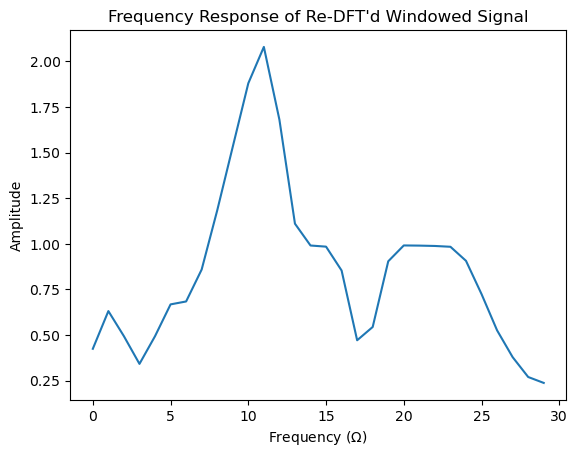

In [9]:
N = int(30/2)

windidftsignal = window('Hamming', 30)*signal

dftsignal = np.abs(DFT(windidftsignal))
plt.plot(dftsignal)
plt.title("Frequency Response of Re-DFT'd Windowed Signal")
plt.ylabel('Amplitude')
plt.xlabel('Frequency ($\Omega$)')

## Try with kernel lengths of 100, 300

100


Text(0.5, 0, 'Frequency ($\\Omega$)')

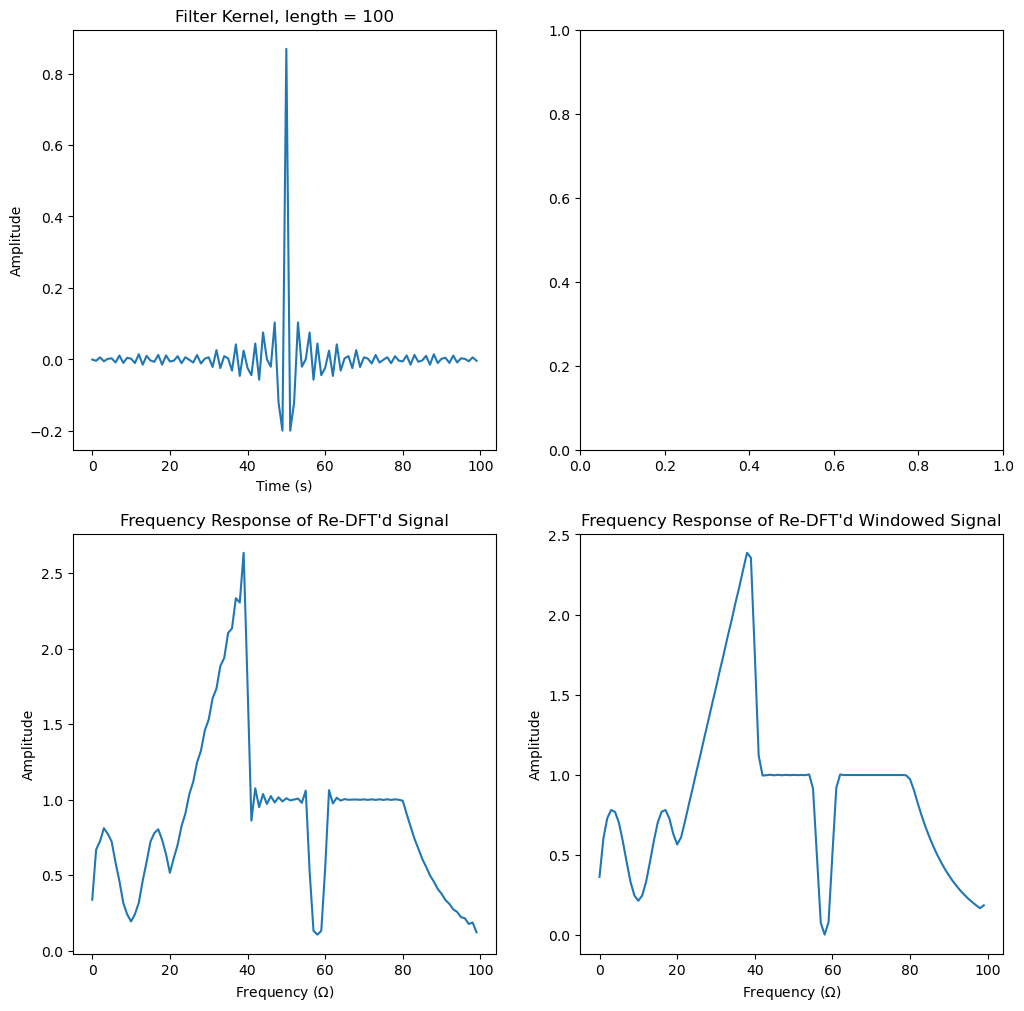

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))

N = 100

signal100 = np.concatenate((idftdata[-int(N/2):], idftdata[:int(N/2)]))
print(len(signal100))
ax[0,0].plot(signal100)
ax[0,0].set_title("Filter Kernel, length = 100")
ax[0,0].set_ylabel('Amplitude')
ax[0,0].set_xlabel('Time (s)')

dftsignal100 = np.abs(DFT(signal100))
ax[1,0].plot(dftsignal100)
ax[1,0].set_title("Frequency Response of Re-DFT'd Signal")
ax[1,0].set_ylabel('Amplitude')
ax[1,0].set_xlabel('Frequency ($\Omega$)')

windidftsignal100 = window('Hamming', 100)*signal100

dftsignal100 = np.abs(DFT(windidftsignal100))
ax[1,1].plot(dftsignal100)
ax[1,1].set_title("Frequency Response of Re-DFT'd Windowed Signal")
ax[1,1].set_ylabel('Amplitude')
ax[1,1].set_xlabel('Frequency ($\Omega$)')

300


Text(0.5, 0, 'Frequency ($\\Omega$)')

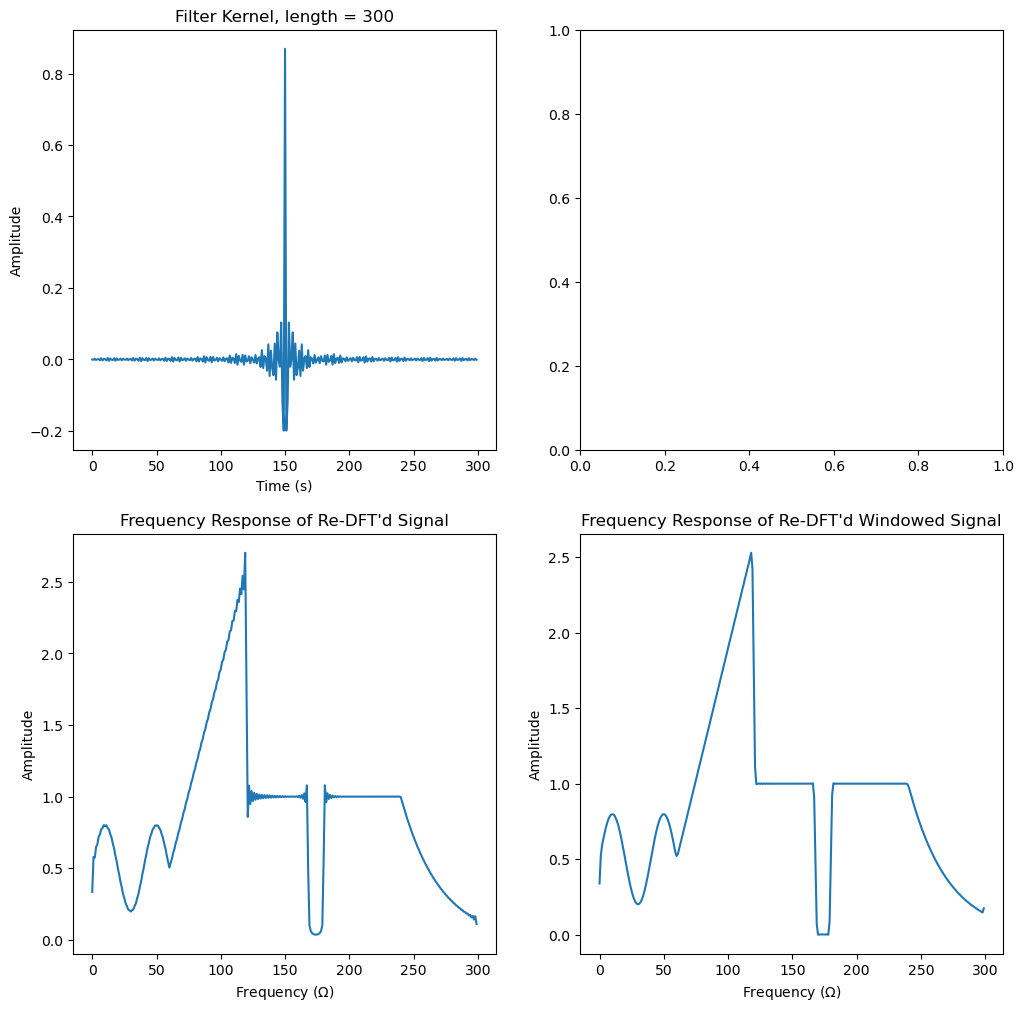

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))

N = 300

signal300 = np.concatenate((idftdata[-int(N/2):], idftdata[:int(N/2)]))
print(len(signal300))
ax[0,0].plot(signal300)
ax[0,0].set_title("Filter Kernel, length = 300")
ax[0,0].set_ylabel('Amplitude')
ax[0,0].set_xlabel('Time (s)')

dftsignal300 = np.abs(DFT(signal300))
ax[1,0].plot(dftsignal300)
ax[1,0].set_title("Frequency Response of Re-DFT'd Signal")
ax[1,0].set_ylabel('Amplitude')
ax[1,0].set_xlabel('Frequency ($\Omega$)')

windidftsignal300 = window('Hamming', 300)*signal300

dftsignal300 = np.abs(DFT(windidftsignal300))
ax[1,1].plot(dftsignal300)
ax[1,1].set_title("Frequency Response of Re-DFT'd Windowed Signal")
ax[1,1].set_ylabel('Amplitude')
ax[1,1].set_xlabel('Frequency ($\Omega$)')

Longer kernel lengths result in a more accurate reconstruction of the data, and applying a window to the kernel removes rippling and smoothens the frequency response.

# Gamma Ray Detector

### reading the data

Text(0.5, 0, 'Time')

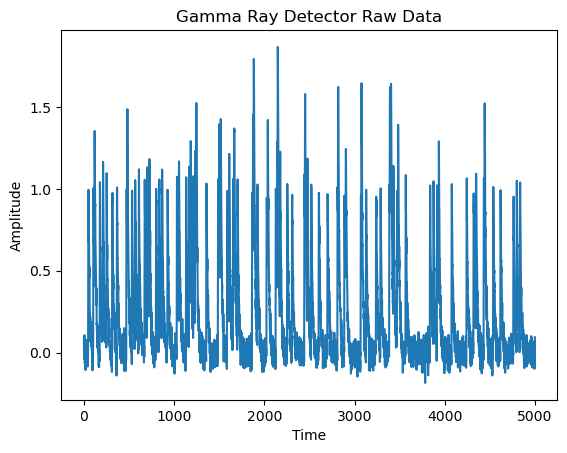

In [12]:
gammadata = np.loadtxt("Data/gamma_data.csv", delimiter=",")

plt.plot(gammadata)
plt.title('Gamma Ray Detector Raw Data')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

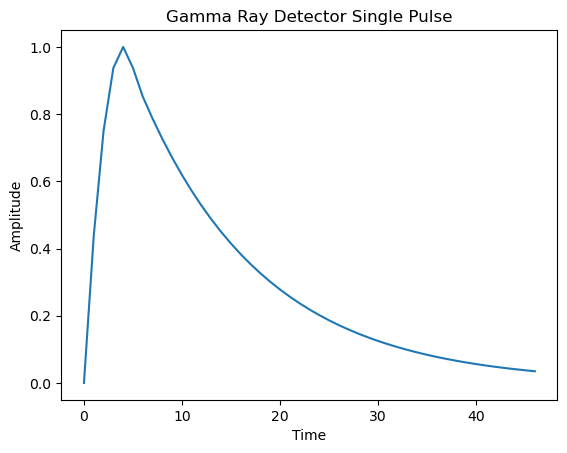

In [13]:
detecteddata = np.loadtxt("Data/detected.csv", delimiter=",")

plt.plot(detecteddata)
plt.title('Gamma Ray Detector Single Pulse')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

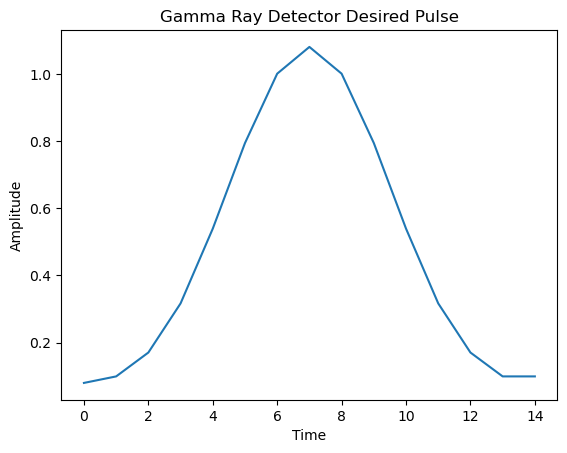

In [14]:
desireddata = np.loadtxt("Data/desired.csv", delimiter=",")

plt.plot(desireddata)
plt.title('Gamma Ray Detector Desired Pulse')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

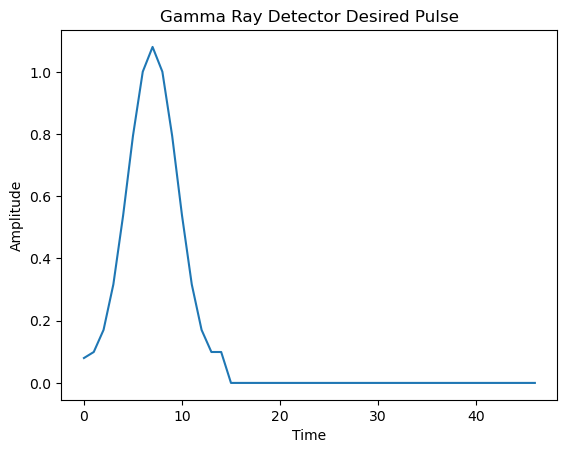

In [15]:
# pad desired data with zeros
desireddatapad = np.append(desireddata, [0]*(len(detecteddata)-len(desireddata)))
plt.plot(desireddatapad)
plt.title('Gamma Ray Detector Desired Pulse')
plt.ylabel('Amplitude')
plt.xlabel('Time')

In [16]:
dftkernel = np.array(DFT(desireddatapad))/np.array(DFT(detecteddata))

kernel = np.fft.ifft(dftkernel)

## Apply filter kernel to Gamma Data

Text(0.5, 1.0, 'Filtered Gamma Ray Detector Data')

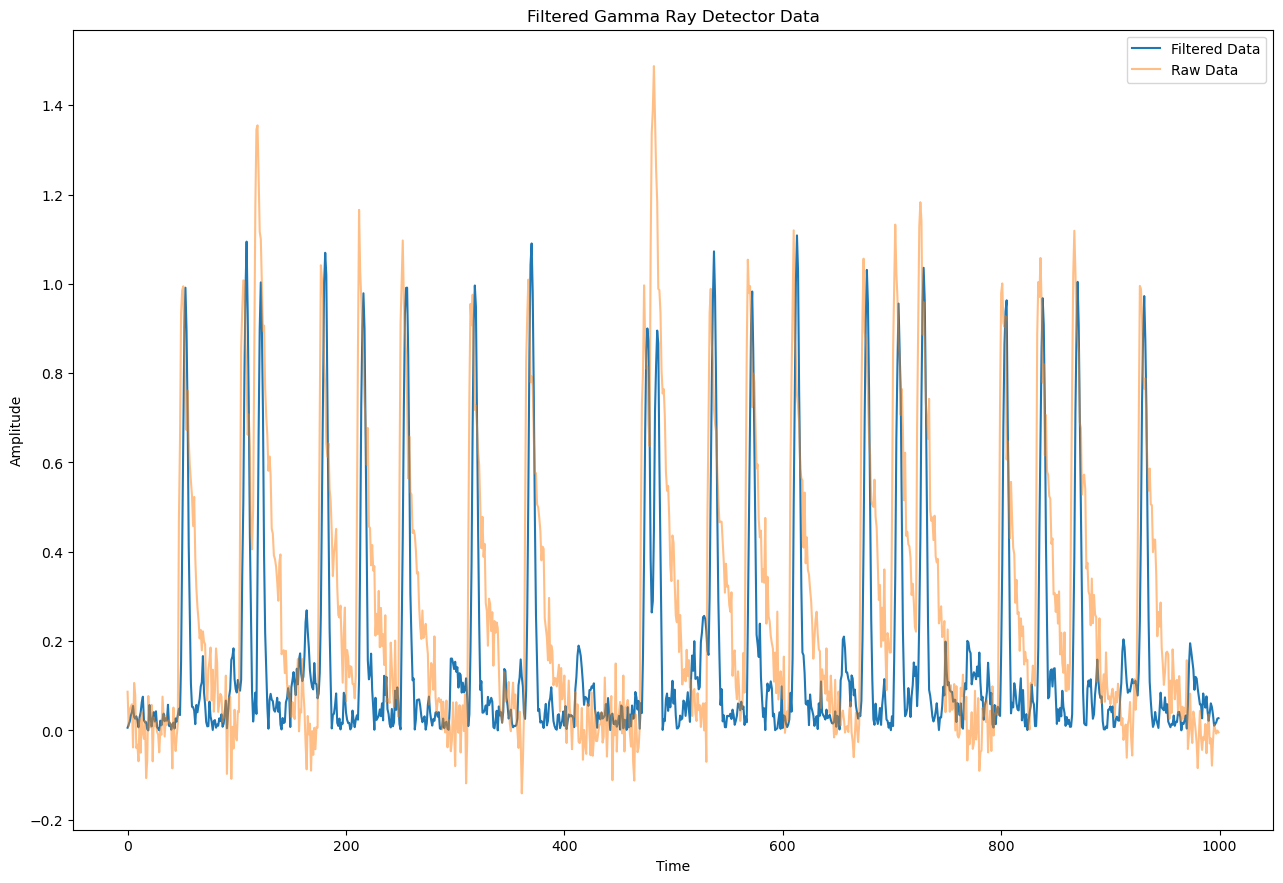

In [17]:
gammafilt = (np.abs(np.convolve(gammadata, kernel)))

fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(gammafilt[:1000], label = 'Filtered Data')
ax.plot(gammadata[:1000], label = 'Raw Data', alpha = 0.5)
ax.legend()
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time')
ax.set_title('Filtered Gamma Ray Detector Data')

## Find Peaks - use correlation function

Text(0.5, 1.0, 'Filtered Gamma Ray Detector Data')

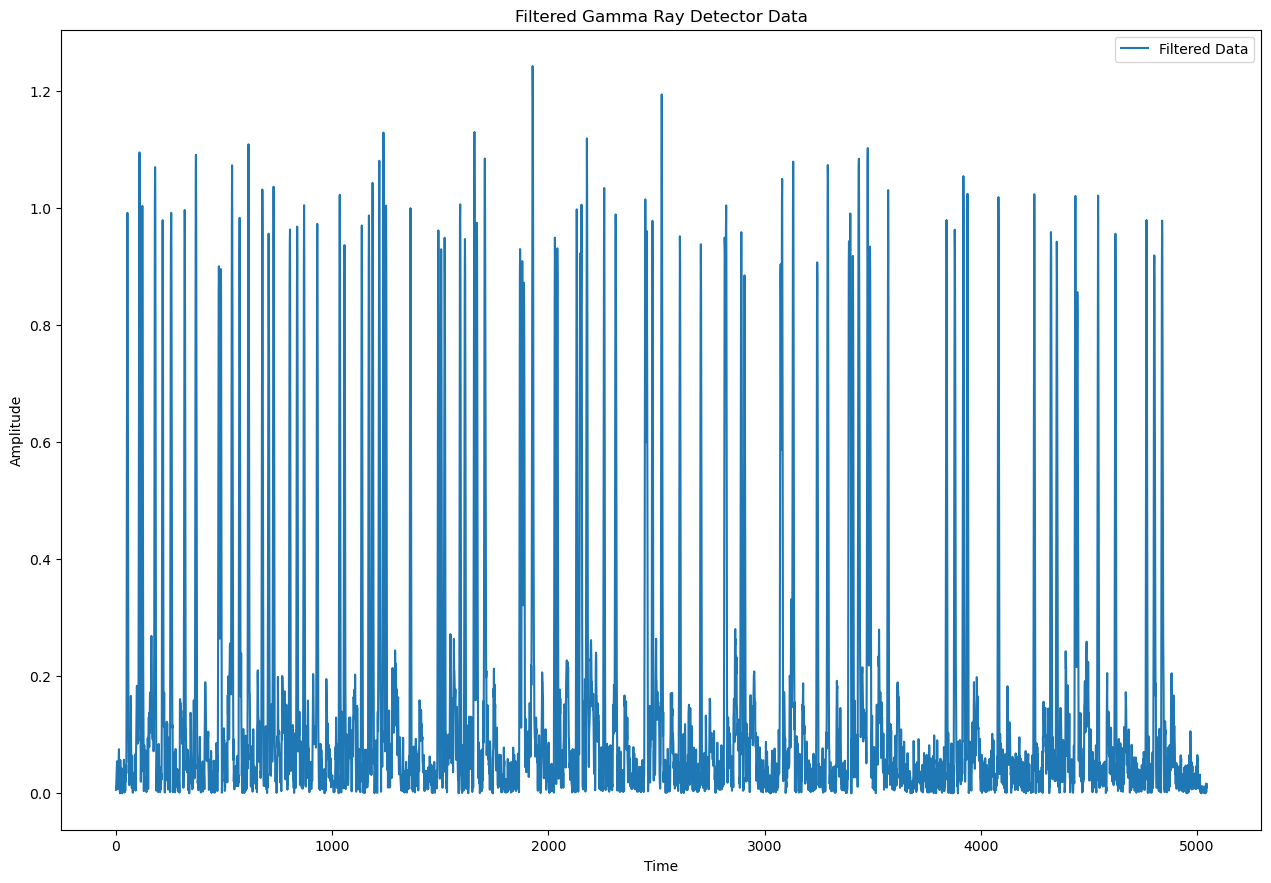

In [18]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(gammafilt, label = 'Filtered Data')
ax.legend()
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time')
ax.set_title('Filtered Gamma Ray Detector Data')

The shortest peak is above a threshold amplitude of about 0.8.

In [19]:
def peakfinder(data, threshold):
    '''data = data to be analyzed'''
    '''threshold = minimum value for peak analysis, should be just smaller than the shortest peak in data'''
    '''returns a list containing index values of peaks found in "data"'''
    peakloc = []
    i = 0
    for i in range(len(data)):  # sweep through data to store matching index data points into final array
        if data[i] > threshold: # only check datapoint values where the data is near a peak/above the threshold
            if (data[i]-data[i-1] > 0) & (data[i]-data[i+1] > 0): # check for a slope change
                peakloc.append(i)
    return peakloc

Text(0.5, 1.0, 'Filtered Gamma Ray Detector Data')

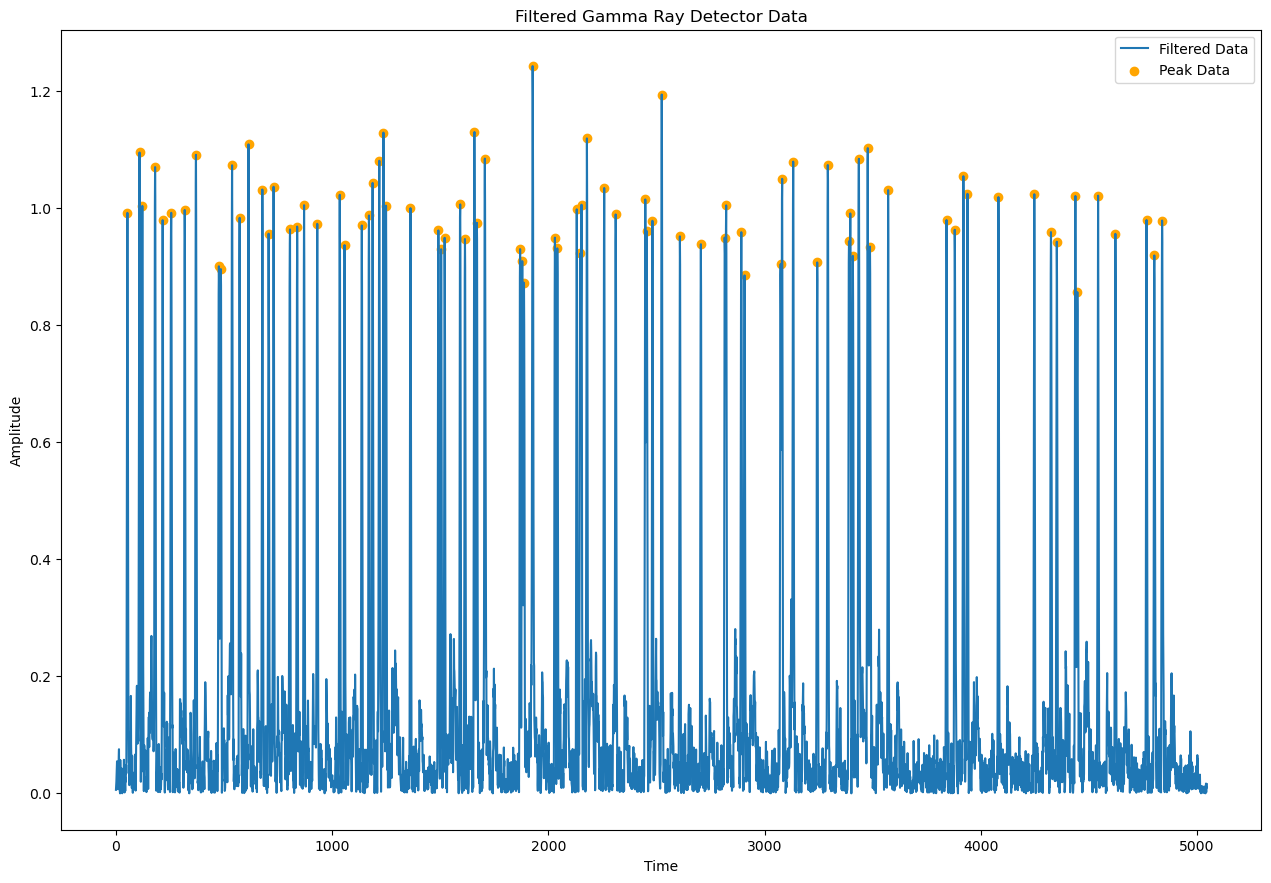

In [20]:
peaksat = peakfinder(gammafilt, 0.8)

gammapeaks = [0]*len(peaksat)
for i in range(len(peaksat)):
    gammapeaks[i] = gammafilt[peaksat[i]]

fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(gammafilt, label = 'Filtered Data')
ax.scatter(x = peaksat, y = gammapeaks, label = 'Peak Data', c = 'orange')
ax.legend()
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time')
ax.set_title('Filtered Gamma Ray Detector Data')
#bax.set_xlim(left = 2000, right = 3000)

In [21]:
print(f'The {len(peaksat)} peaks in the gamma ray detector data care located at samples {peaksat}.')

The 86 peaks in the gamma ray detector data care located at samples [53, 109, 122, 181, 216, 256, 318, 370, 476, 485, 537, 572, 613, 677, 706, 729, 805, 838, 870, 931, 1035, 1057, 1137, 1170, 1187, 1218, 1237, 1249, 1362, 1491, 1504, 1520, 1592, 1614, 1658, 1669, 1706, 1869, 1879, 1886, 1927, 2030, 2041, 2131, 2147, 2153, 2178, 2258, 2311, 2448, 2455, 2481, 2524, 2608, 2705, 2815, 2822, 2892, 2907, 3074, 3081, 3132, 3243, 3292, 3390, 3396, 3408, 3436, 3477, 3487, 3571, 3841, 3879, 3919, 3938, 4081, 4247, 4324, 4351, 4437, 4446, 4542, 4622, 4766, 4802, 4838].


# Overlap Method and FFT Convolution

In [22]:
#import old sinc filter generator

def losinc(size):
    '''size must be an odd integer'''
    impres_lopass = [0]*size # define width of the impulse reponse
    
    i = 0
    for i in range(size): # sinc values inserted, and graph is shifted so that the output is a horizontally symmetrical array
        impres_lopass[i] = np.sinc((i-size//2)/np.pi)
        
    storesum = sum(impres_lopass)
    i = 0
    for i in range(size): # normalize values
        impres_lopass[i] = impres_lopass[i]/storesum
    
    return impres_lopass

Text(0.5, 0, 'Time')

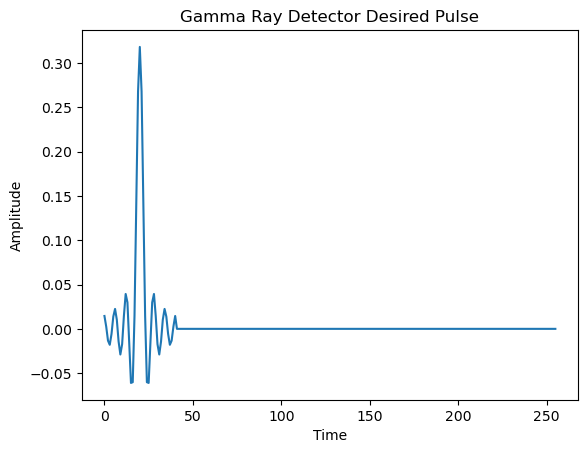

In [23]:
sinc = losinc(41) + [0]*(256-41)

plt.plot(sinc)
plt.title('Gamma Ray Detector Desired Pulse')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Text(0, 0.5, 'Amplitude')

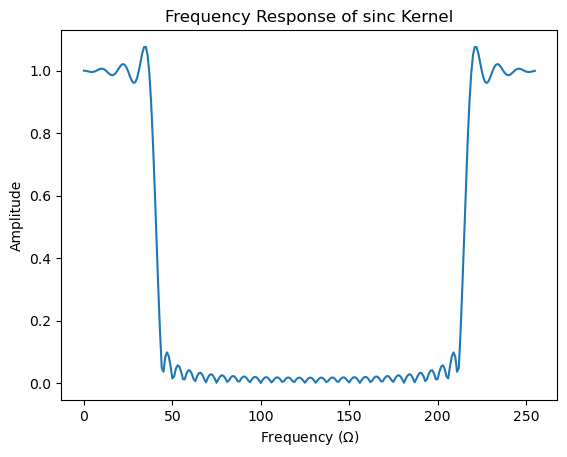

In [24]:
dftsinc = DFT(sinc)
plt.plot(np.abs(dftsinc))
plt.title('Frequency Response of sinc Kernel')
plt.xlabel('Frequency ($\Omega$)')
plt.ylabel('Amplitude')

importing old voice recording code cell from Lab 1

209920


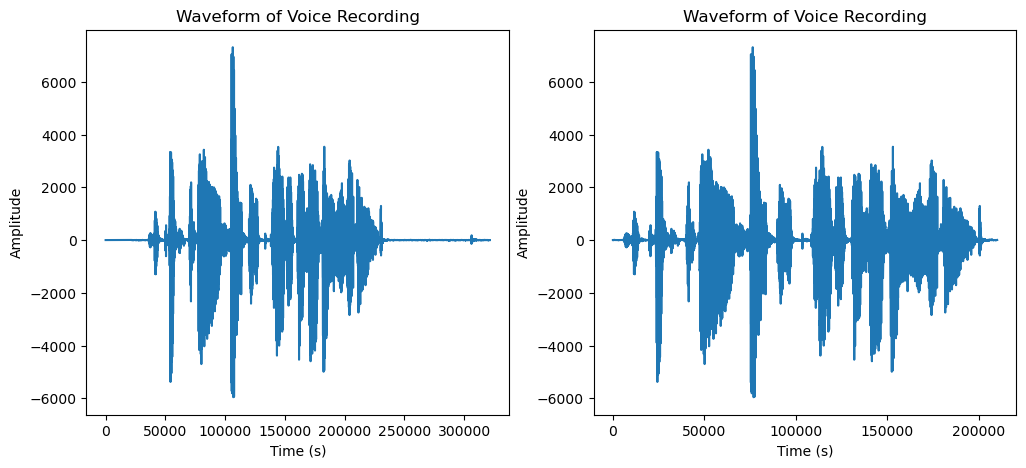

In [25]:
fsamp, data = wavfile.read('wav files/quick brown fox.wav') #fsamp is the sampling rate
OGFox = data[:,0] # Left Channel

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

ax[0].plot(OGFox)
ax[0].set_title('Waveform of Voice Recording')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

# 240 000 - 30 000 = 210 000 --> 210 000//128 = 1640 --> 1640*125 = 209 920 --> +30000 = 239 920
OGFox = OGFox[30000:239920] # trim sample size down to a nice multiple of 128 for the next step
ax[1].plot(OGFox)
ax[1].set_title('Waveform of Voice Recording')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')

print(len(OGFox)) # double check length


### Processing the wavfile data into sections, then padding with zeros to match the padded sinc kernel

In [26]:
splitdata = np.array_split(OGFox, 1640) # split data into 1640 groups of 128 points

1640 128
256
[-411. -504. -552. -549. -554. -549. -488. -429. -342. -267. -258. -211.
 -141.  -98.  -59.  -39.   13.  110.  191.  270.  333.  416.  513.  549.
  601.  625.  601.  639.  671.  676.  672.  660.  660.  636.  608.  592.
  554.  550.  607.  647.  673.  727.  771.  763.  749.  786.  820.  834.
  909. 1049. 1173. 1290. 1407. 1481. 1547. 1614. 1628. 1594. 1590. 1615.
 1604. 1533. 1456. 1401. 1309. 1193. 1064.  917.  810.  692.  565.  454.
  314.  215.  121.   -9.  -91. -189. -278. -319. -365. -382. -386. -372.
 -295. -235. -189. -129.  -81.   -6.   49.   83.  179.  285.  393.  507.
  587.  704.  769.  786.  844.  852.  874.  903.  883.  925.  945.  917.
  874.  818.  815.  801.  743.  724.  737.  753.  757.  715.  685.  671.
  629.  604.  576.  540.  546.  544.  527.  525.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.  

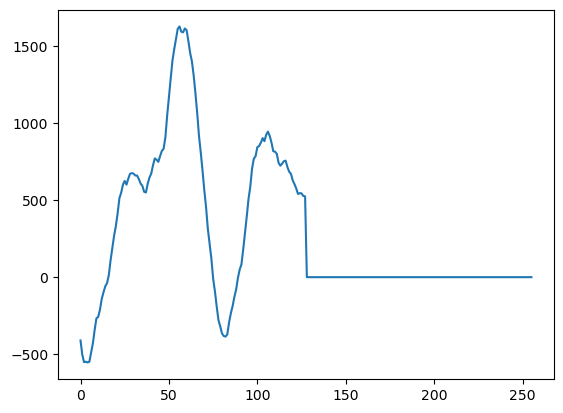

In [27]:
print(len(splitdata), len(splitdata[420])) # checking arrays are of correct length and there are correct number of arrays

# pad each subarray with zeros to get length 256
padding = np.zeros(128)
for i in range(len(splitdata)):
    splitdata[i] = np.append(splitdata[i],padding)

print(len(splitdata[420]))
print(splitdata[420])
plt.plot(splitdata[420])

## Take DFTs of every section of data

In [28]:
time_start = time.process_time()

dftsegments = [[]]*1640
#run your code
for i in range (1640):
    dftsegments[i] = DFT(splitdata[i])

time_elapsed = (time.process_time()- time_start)
print("Run time: %3.3f s" % time_elapsed)

print(len(dftsegments), len(dftsegments[420]))


Run time: 153.609 s
1640 256


note: I tried with np.fft.fft and it finished in ~1.2 seconds

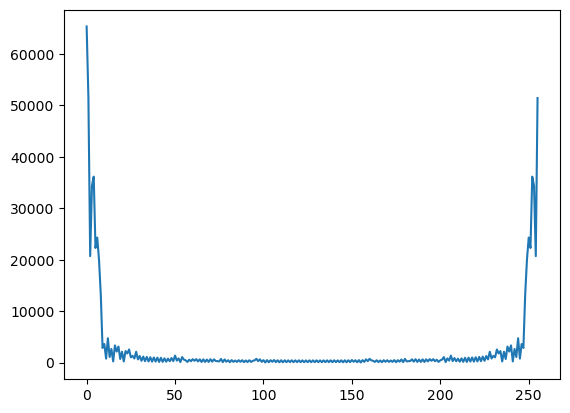

In [29]:
plt.plot(np.abs(dftsegments[420]))

## Perform a time convolution by multiplying every segment dft with the sinc kernel dft

Run time for overlap FFT convolution: 0.031 s
1640 256


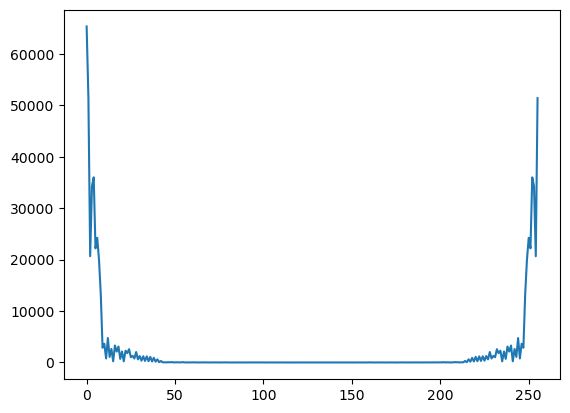

In [30]:
foxfiltDFTsplit = [[]]*len(dftsegments)


time_start = time.process_time()

for i in range(len(dftsegments)):
    foxfiltDFTsplit[i] = dftsegments[i] * np.array(dftsinc)

time_elapsed = (time.process_time()- time_start)
print("Run time for overlap FFT convolution: %3.3f s" % time_elapsed)

print(len(foxfiltDFTsplit), len(foxfiltDFTsplit[420]))
plt.plot(np.abs(foxfiltDFTsplit[420]))

## Converting filtered segments back into time space

1640 256


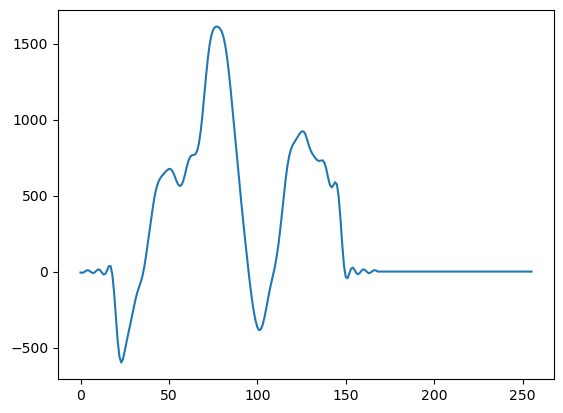

In [31]:
foxfiltIDFTsplit = [[]]*1640

for i in range (1640):
    foxfiltIDFTsplit[i] = np.fft.ifft(foxfiltDFTsplit[i])


print(len(foxfiltIDFTsplit), len(foxfiltIDFTsplit[420]))
plt.plot(foxfiltIDFTsplit[420])

In [32]:
foxfiltIDFTsplit[420][60]

(684.0166436999755+1.1069837707801958e-12j)

3280 128
1638 0


Text(0, 0.5, 'Amplitude')

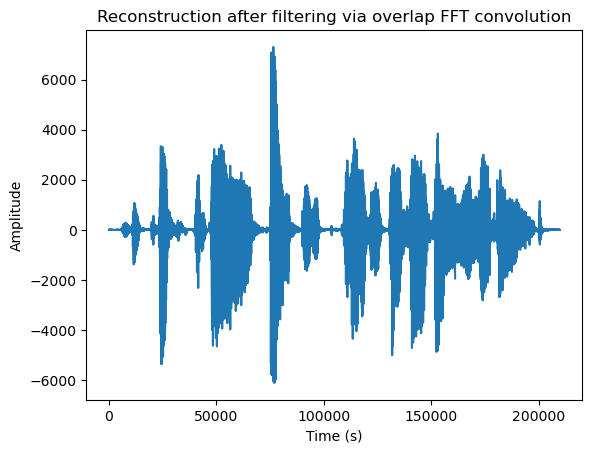

In [33]:
foxfiltjoin = np.concatenate(foxfiltIDFTsplit) # join every subarray into a single array twice the length of the original data
foxfiltjoin = np.array_split(foxfiltjoin, 1640*2) # resplit data into 3280 subarrays of length 128
print(len(foxfiltjoin), len(foxfiltjoin[420]))

foxfiltmiddle = [[]]*1638 # set up array to store the summed overlapping sections
print(len(foxfiltmiddle), len(foxfiltmiddle[420]))

for i in range(1638):
    back = 2*i
    front = 2*i + 1
    foxfiltmiddle[i] = np.add(foxfiltjoin[back],foxfiltjoin[front]) # back half of prior segment + front half of next segment= overlap section of reconstruction

# making these as separate arrays for posterity
foxfiltstart = foxfiltjoin[0]
foxfiltend = foxfiltjoin[-1]

# join arrays
foxfiltmiddle = np.concatenate(foxfiltmiddle) # unify overlapped segments into one large array
foxfilt = np.concatenate((foxfiltstart, foxfiltmiddle, foxfiltend))

plt.plot(foxfilt)
plt.title('Reconstruction after filtering via overlap FFT convolution')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')




## Combining all steps for timing

In [35]:
time_start = time.process_time()
#run your code


'''split data into 1640 groups of 128 points'''
splitdata = np.array_split(OGFox, 1640)

'''pad each subarray with zeros to get length 256'''
padding = np.zeros(128)
for i in range(len(splitdata)):
    splitdata[i] = np.append(splitdata[i],padding)
    
'''take DFT of every segment'''
dftsegments = [[]]*1640
for i in range (1640):
    dftsegments[i] = DFT(splitdata[i])

'''take convolution by multiplying the segment frequency responses with the sinc dft'''
foxfiltDFTsplit = [[]]*len(dftsegments)
for i in range(len(dftsegments)):
    foxfiltDFTsplit[i] = dftsegments[i] * np.array(dftsinc)

'''take IDFT of every convolved segment to convert back into time space'''
foxfiltIDFTsplit = [[]]*1640
for i in range (1640):
    foxfiltIDFTsplit[i] = IDFT(foxfiltDFTsplit[i])
    
'''recombine the segments to reform recording'''
foxfiltjoin = np.concatenate(foxfiltIDFTsplit) # join every subarray into a single array twice the length of the original data
foxfiltjoin = np.array_split(foxfiltjoin, 1640*2) # resplit data into 3280 subarrays of length 128
print(len(foxfiltjoin), len(foxfiltjoin[420]))

foxfiltmiddle = [[]]*1638 # set up array to store the summed overlapping sections
print(len(foxfiltmiddle), len(foxfiltmiddle[420]))

for i in range(1638):
    back = 2*i
    front = 2*i + 1
    foxfiltmiddle[i] = np.add(foxfiltjoin[back],foxfiltjoin[front]) # back half of prior segment + front half of next segment= overlap section of reconstruction

# making these as separate arrays for posterity
foxfiltstart = foxfiltjoin[0]
foxfiltend = foxfiltjoin[-1]

# join arrays
foxfiltmiddle = np.concatenate(foxfiltmiddle) # unify overlapped segments into one large array
foxfilt = np.concatenate((foxfiltstart, foxfiltmiddle, foxfiltend))

    
time_elapsed = (time.process_time()- time_start)
print("Run time: %3.3f s" % time_elapsed)

3280 128
1638 0
Run time: 217.750 s


# Regular Convolution

np.convolve was too fast so I'm using the old function

In [36]:
def myconv(list1, list2):
    '''outputs an array with values as far as list2 fits entirely in list1'''
    '''list1 (sample data) must be longer than list2 (convolution data)'''
    convarr = [0]*(len(list1)) # set final array length based on given lists
    i = 0
    for i in range(len(list1)+len(list2)+1):          # sweep through longer list data to store matching index data points into final array
        if i<len(list1):
            j = 0
            for j in range(len(list2)):
                convarr[i] += list1[i-j]*list2[j]
    return convarr

Run time for normal convolution (using padded sinc window): 64.125 s
Run time for normal convolution (using unpadded sinc window): 10.953 s


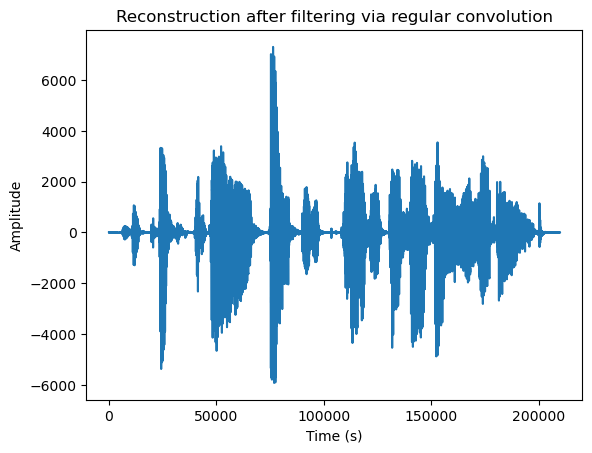

In [37]:
time_start = time.process_time()

foxconvfilt = myconv(OGFox, sinc)

time_elapsed = (time.process_time()- time_start)
print("Run time for normal convolution (using padded sinc window): %3.3f s" % time_elapsed)

plt.plot(foxconvfilt)
plt.title('Reconstruction after filtering via regular convolution')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

time_start = time.process_time()

foxconvfilt = myconv(OGFox, losinc(41))

time_elapsed = (time.process_time()- time_start)
print("Run time for normal convolution (using unpadded sinc window): %3.3f s" % time_elapsed)



For some reason the convolution was faster so I'll try using the numpy packaged functions for fft/ifft and convolve.

## Combined Overlap FFT convolution Method

In [39]:
time_start = time.process_time()
#run your code


'''split data into 1640 groups of 128 points'''
splitdata = np.array_split(OGFox, 1640)

'''pad each subarray with zeros to get length 256'''
padding = np.zeros(128)
for i in range(len(splitdata)):
    splitdata[i] = np.append(splitdata[i],padding)
    
'''take DFT of every segment'''
dftsegments = [[]]*1640
for i in range (1640):
    dftsegments[i] = np.fft.fft(splitdata[i])

'''take convolution by multiplying the segment frequency responses with the sinc dft'''
foxfiltDFTsplit = [[]]*len(dftsegments)
for i in range(len(dftsegments)):
    foxfiltDFTsplit[i] = dftsegments[i] * np.array(dftsinc)

'''take IDFT of every convolved segment to convert back into time space'''
foxfiltIDFTsplit = [[]]*1640
for i in range (1640):
    foxfiltIDFTsplit[i] = np.fft.ifft(foxfiltDFTsplit[i])
    
'''recombine the segments to reform recording'''
foxfiltjoin = np.concatenate(foxfiltIDFTsplit) # join every subarray into a single array twice the length of the original data
foxfiltjoin = np.array_split(foxfiltjoin, 1640*2) # resplit data into 3280 subarrays of length 128
print(len(foxfiltjoin), len(foxfiltjoin[420]))

foxfiltmiddle = [[]]*1638 # set up array to store the summed overlapping sections
print(len(foxfiltmiddle), len(foxfiltmiddle[420]))

for i in range(1638):
    back = 2*i
    front = 2*i + 1
    foxfiltmiddle[i] = np.add(foxfiltjoin[back],foxfiltjoin[front]) # back half of prior segment + front half of next segment= overlap section of reconstruction

# making these as separate arrays for posterity
foxfiltstart = foxfiltjoin[0]
foxfiltend = foxfiltjoin[-1]

# join arrays
foxfiltmiddle = np.concatenate(foxfiltmiddle) # unify overlapped segments into one large array
foxfilt = np.concatenate((foxfiltstart, foxfiltmiddle, foxfiltend))

    
time_elapsed = (time.process_time()- time_start)
print("Run time: %3.3f s" % time_elapsed)

3280 128
1638 0
Run time: 0.047 s


## Convolution

Run time for normal convolution (using padded sinc window): 0.016 s
Run time for normal convolution (using unpadded sinc window): 0.016 s


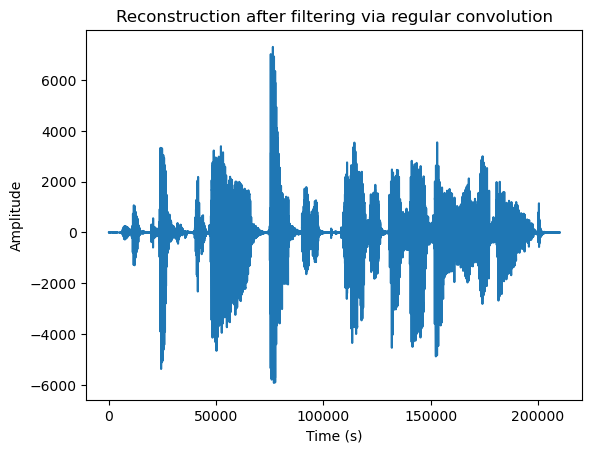

In [40]:
time_start = time.process_time()

foxconvfilt = np.convolve(OGFox, sinc)

time_elapsed = (time.process_time()- time_start)
print("Run time for normal convolution (using padded sinc window): %3.3f s" % time_elapsed)

plt.plot(foxconvfilt)
plt.title('Reconstruction after filtering via regular convolution')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

time_start = time.process_time()

foxconvfilt = np.convolve(OGFox, losinc(41))

time_elapsed = (time.process_time()- time_start)
print("Run time for normal convolution (using unpadded sinc window): %3.3f s" % time_elapsed)



## Writing wav files

In [41]:
import IPython

In [43]:
genoverlapmethod = np.asarray(foxfilt, dtype=np.int16)
wavfile.write('Overlap FFT Method Result.wav',fsamp,genoverlapmethod)

IPython.display.Audio("Overlap FFT Method Result.wav")

C:\Users\georg\AppData\Local\Temp\ipykernel_56132\117745908.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  genoverlapmethod = np.asarray(foxfilt, dtype=np.int16)


In [44]:
genconvolution = np.asarray(foxconvfilt, dtype=np.int16)
wavfile.write('Regular Convolution Method Result.wav',fsamp,genconvolution)

IPython.display.Audio("Regular Convolution Method Result.wav")